# Hearing Prediction

This project aims to predict the hearing on individuals based on their age and physical score.

## Steps

* Libraries Importing 
* Data Importing 
* Data Wrangling
* Data Visualization
* Model Creation
* Model parameters tuning
* Prediction

# Libraries Importing

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Data Importing

In [3]:
hear_df = pd.read_csv("hearing_test.csv")

In [12]:
hear_df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# Data Wrangling

In [5]:
hear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [22]:
hear_df[hear_df.duplicated()]

,age,physical_score,test_result
91,55.0,36.5,1
195,38.0,41.1,1
201,51.0,35.1,1
244,57.0,33.1,1
352,48.0,36.4,1
...,...,...,...
4988,36.0,41.4,1
4990,57.0,23.6,0
4994,41.0,39.9,1
4997,49.0,34.5,1


There are no missing values but duplicates do exist and they have to be dropped in order not to bias the result

In [20]:
new_hear_df = hear_df.drop_duplicates()

In [23]:
new_hear_df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# Data Visualization

<AxesSubplot:xlabel='test_result', ylabel='age'>

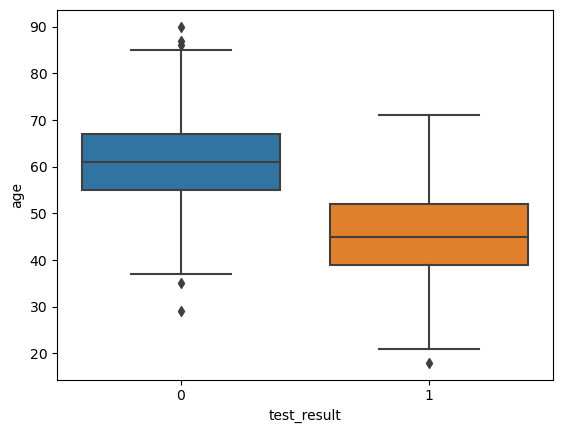

In [32]:
sns.boxplot(data=new_hear_df, x="test_result", y="age")

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

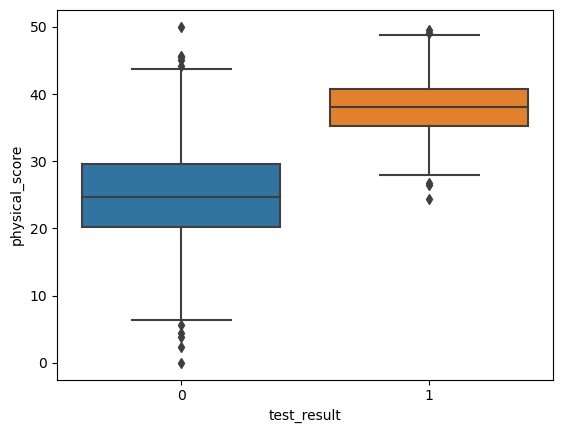

In [34]:
sns.boxplot(data=new_hear_df, x="test_result", y="physical_score")

<AxesSubplot:xlabel='test_result', ylabel='count'>

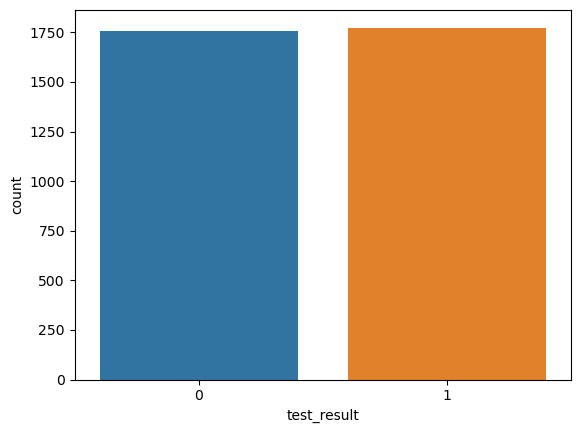

In [29]:
sns.countplot(data=new_hear_df, x="test_result")

The data seems roughly balanced

<AxesSubplot:>

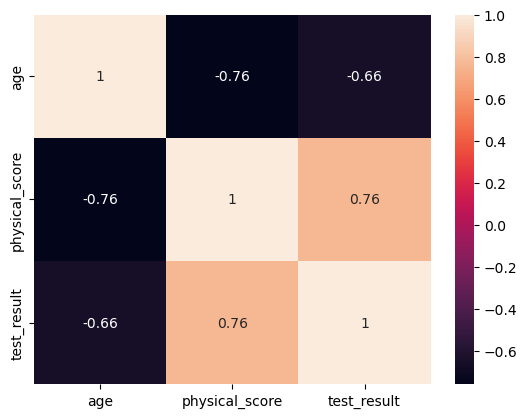

In [35]:
sns.heatmap(data=new_hear_df.corr(), annot=True)

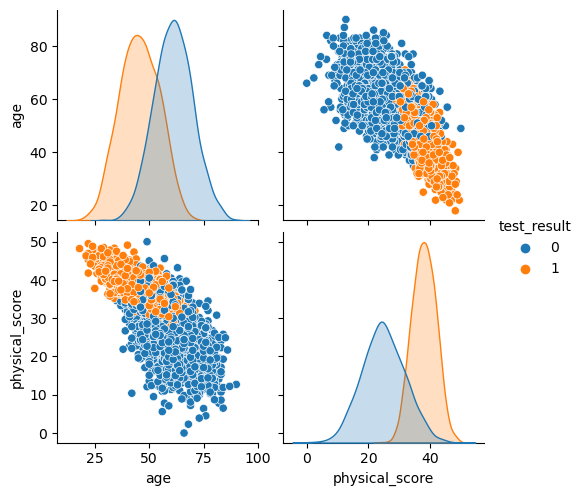

In [39]:
sns.pairplot(data=new_hear_df, hue="test_result")

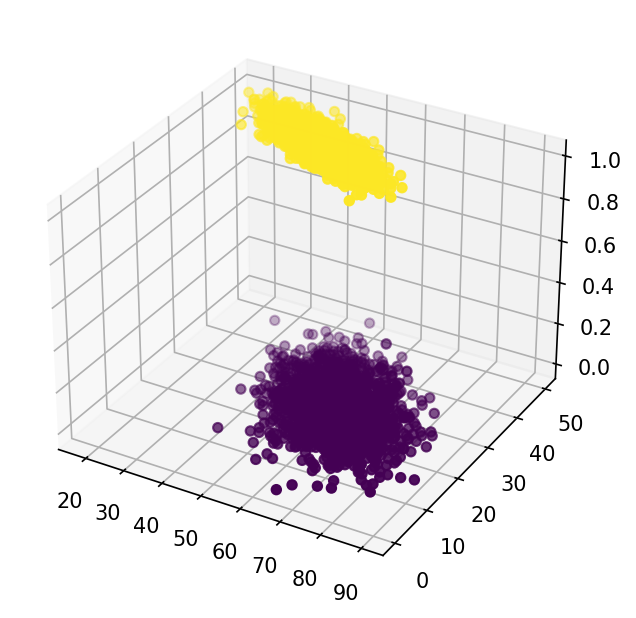

In [40]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_hear_df['age'],new_hear_df['physical_score'],new_hear_df['test_result'],c=new_hear_df['test_result'])

It can be seen that there is a fine seperation so we expect model that predict well with very little or no tuning

# Model Creation

In [62]:
X = new_hear_df.drop("test_result", axis=1)
y = new_hear_df["test_result"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=131)

In [64]:
scaler = StandardScaler()

In [65]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [66]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svc_model = SVC()

In [129]:
log_model.fit(scaled_X_train, y_train)
knn_model.fit(scaled_X_train, y_train)
svc_model.fit(scaled_X_train, y_train)

SVC()

In [130]:
log_pred = log_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was 

In [131]:
print("The accuracy of the Logistic Regression model is ", accuracy_score(log_pred, y_test))

The accuracy of the Logistic Regression model is  0.5177053824362606


In [132]:
print("The accuracy of the K Nearest Neighbors model is ", accuracy_score(knn_pred, y_test))

The accuracy of the K Nearest Neighbors model is  0.4922096317280453


In [133]:
print("The accuracy of the Support Vector Machine model is ", accuracy_score(svc_pred, y_test))

The accuracy of the Support Vector Machine model is  0.4922096317280453


Poor accuracies are rather suprising in this case. Another trial is carried out which involves model tuning and the use of the unscaled data.

# Model Parameters Tuning

For the K Nearest Neighbors model, we vary the number of neighbors and use the unscaled data

In [148]:
accuracy = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, knn_pred))

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

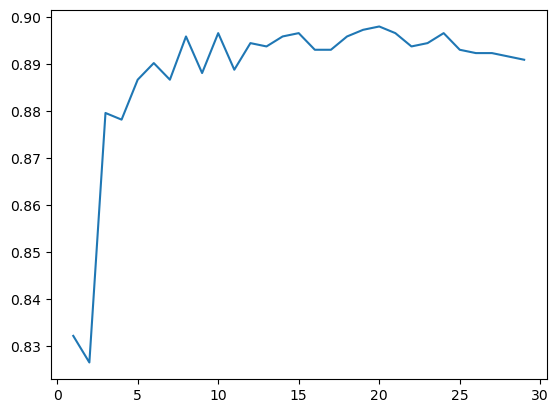

In [149]:
plt.plot(np.arange(1,30), accuracy)

The accuracy seems to smoothen out at k = 15 with noise causing varying values

For the Logistic Regression model, we vary the cutoff probability and use the unscaled data

In [151]:
log = LogisticRegression()

In [152]:
log.fit(X_train, y_train)

LogisticRegression()

In [153]:
lgpp = log.predict_proba(X_test)

In [154]:
accuracy_log = []

for i in range(1,10):
    log_predd = [1 if j > 0.1 * i else 0 for j in lgpp[:,1]]
    accuracy_log.append(accuracy_score(y_test, np.array(log_predd)))

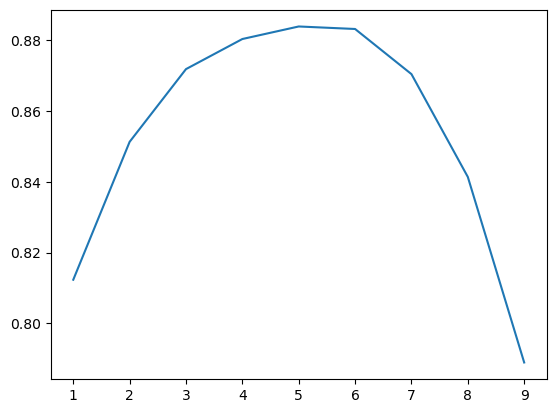

In [155]:
plt.plot(np.arange(1,10), accuracy_log)

The optimal value is at a cutoff of prob = 0.5

For the Support Vector Machines model, we vary the cutoff probability and use the unscaled data

In [182]:
svc = SVC(probability=True, kernel="rbf")

In [183]:
svc.fit(X_train, y_train)

SVC(probability=True)

In [184]:
svcp = svc.predict_proba(X_test)

In [185]:
accuracy_svc = []

for i in range(1,10):
    svc_predd = [1 if j > 0.1 * i else 0 for j in svcp[:,1]]
    accuracy_svc.append(accuracy_score(y_test, np.array(svc_predd)))

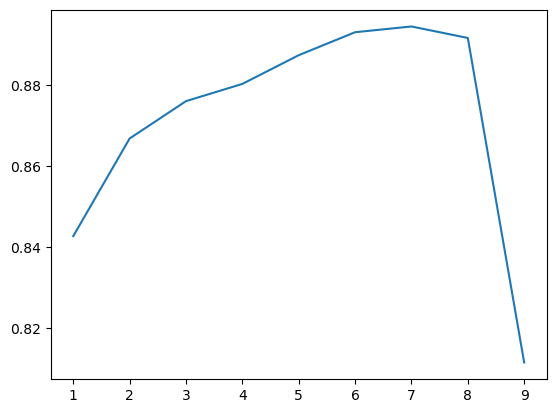

In [186]:
plt.plot(np.arange(1,10), accuracy_svc)

The optimal value is at a cutoff of prob = 0.7

A display of the total classification report is displayed below for each of the models

# Prediction

In [194]:
knn_model = KNeighborsClassifier(n_neighbors=15)
log_model = LogisticRegression()
svc_model = SVC(kernel="rbf", probability=True)

In [195]:
knn_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [196]:
knn_pred = knn_model.predict(X_test)

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [197]:
log_pred = [1 if j > 0.5 else 0 for j in log_model.predict_proba(X_test)[:,1]]

In [198]:
svc_pred = [1 if j > 0.7 else 0 for j in svc_model.predict_proba(X_test)[:,1]]

In [200]:
print("For the KNN model, we have\n\n",classification_report(y_test,knn_pred))

For the KNN model, we have

               precision    recall  f1-score   support

           0       0.96      0.83      0.89       695
           1       0.85      0.96      0.90       717

    accuracy                           0.90      1412
   macro avg       0.90      0.90      0.90      1412
weighted avg       0.90      0.90      0.90      1412



In [201]:
print("For the Logistic Regression model, we have\n\n",classification_report(y_test,log_pred))

For the Logistic Regression model, we have

               precision    recall  f1-score   support

           0       0.91      0.85      0.88       695
           1       0.86      0.92      0.89       717

    accuracy                           0.88      1412
   macro avg       0.89      0.88      0.88      1412
weighted avg       0.89      0.88      0.88      1412



In [202]:
print("For the Support Vector Machine model, we have\n\n",classification_report(y_test,svc_pred))

For the Support Vector Machine model, we have

               precision    recall  f1-score   support

           0       0.90      0.88      0.89       695
           1       0.89      0.91      0.90       717

    accuracy                           0.89      1412
   macro avg       0.89      0.89      0.89      1412
weighted avg       0.89      0.89      0.89      1412



It is obvious that the models perform very good on the dataset and predict with a veryhigh accuracy of between 88% - 90%. The choice of the model however is dependent on the purpose of the study and on what exactly the emphasis is. In this case, it is more likely we want to know those people with poor hearing even if we sacrifice some model metrics and get some false negatives. In this case, it would be easier to tweak the Support Vector Machine model as it has a recall closer to 100%. If might be our goal to predict all the people with poor hearing even if we mistakenly classify those with good hearing as poor. 